In [1]:
# Basic utilities
import csv
import pandas as pd
import numpy as np

# Transformers
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin

# Models
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier

## Research Phase

In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

In [ ]:
X = df[["age", "job", "marital", "education", "default", "balance", "housing", "loan"]]
y = df["y"]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
ohe = ColumnTransformer([
    ('job', OneHotEncoder(), ['job']),
    ('marital', OneHotEncoder(), ['marital']),
    ('education', OneHotEncoder(), ['education']),
    ('default', OneHotEncoder(), ['default']),
    ('housing', OneHotEncoder(), ['housing']),
    ('loan', OneHotEncoder(), ['loan']),
], remainder='passthrough')
ohe.fit(X)

In [ ]:
yp = LabelEncoder().fit_transform(y)

In [ ]:
Xp = ohe.transform(X)
Xp.shape

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(Xp, y)
model.score(Xp, y)

In [ ]:
[a for a in dir(model) if a.endswith('_') and not a.startswith('_')]

In [ ]:
[a for a in dir(LogisticRegression()) if a.endswith('_') and not a.startswith('_')]

In [ ]:
instance = pd.DataFrame([X.iloc[342]])

In [ ]:
instance

In [ ]:
model.predict(ohe.transform(instance))

In [ ]:
y.iloc[342]

In [ ]:
model.predict_proba(ohe.transform(instance))

In [ ]:
from yellowbrick.features import feature_importances

In [ ]:
feature_importances(model, is_fitted=True, X=Xp, y=y)

## Cleanup Phase

In [ ]:
def load_data(path="bank-full.csv", sep=";"):
    X, y = [], []
    with open(path, 'r') as f:
        reader = csv.DictReader(f, delimiter=sep)
        for row in reader:
            y.append(row['y'])
            row.pop('y')
            X.append(row)
    
    return X, y


X, y = load_data()

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
X = df[["age", "job", "marital", "education", "default", "balance", "housing", "loan"]]
y = df["y"]

In [ ]:
model = Pipeline([
    ('cols', ColumnTransformer([
        ('age', RobustScaler(), ['age']),
        ('job', OneHotEncoder(), ['job']),
        ('marital', OneHotEncoder(), ['marital']),
        ('education', OneHotEncoder(), ['education']),
        ('default', OneHotEncoder(), ['default']),
        ('balance', RobustScaler(), ['balance']),
        ('housing', OneHotEncoder(), ['housing']),
        ('loan', OneHotEncoder(), ['loan']),
    ], remainder='drop')),
    ('kbest', SelectKBest(k=12)),
    ('clf', GradientBoostingClassifier()),
])

model.fit(X, y)

In [ ]:
model.score(X,y)

In [ ]:
model.get_params()

In [ ]:
model.set_params(cols__age__unit_variance=True, cols__age__with_centering=False)

In [ ]:
print(model['cols'].named_transformers_['age'].scale_)
print(model['cols'].named_transformers_['age'].center_)

In [ ]:
class MyTransformer(BaseEstimator, TransformerMixin):
    
    def fit(self, X):
        # TODO: fit my transfoerm
        return self
    
    def transform(self, X):
        # TODO: return new X
        return X

In [ ]:
dir(MyTransformer())

In [10]:
from yellowbrick.target import class_balance

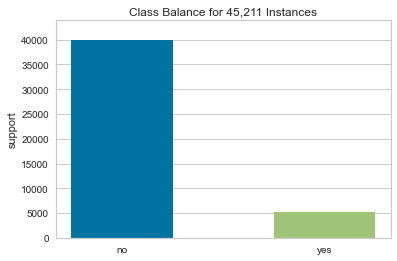

ClassBalance(ax=<AxesSubplot:title={'center':'Class Balance for 45,211 Instances'}, ylabel='support'>)

In [11]:
class_balance(y)

## Cross Validation

In [3]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score

In [14]:
# Create train test splits for initial evaluation
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, shuffle=True, stratify=y)

In [15]:
print(X_train.shape, y_train.shape)

(36168, 8) (36168,)


In [16]:
print(X_test.shape, y_test.shape)

(9043, 8) (9043,)


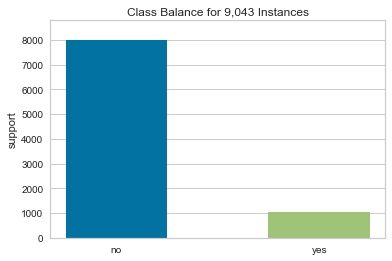

ClassBalance(ax=<AxesSubplot:title={'center':'Class Balance for 9,043 Instances'}, ylabel='support'>)

In [20]:
class_balance(y_test)

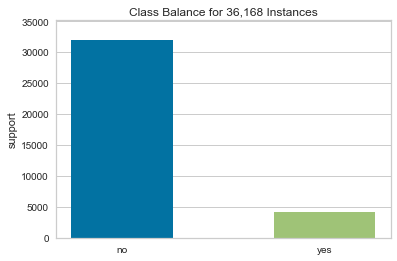

ClassBalance(ax=<AxesSubplot:title={'center':'Class Balance for 36,168 Instances'}, ylabel='support'>)

In [21]:
class_balance(y_train)

In [ ]:
# Evaluate Gradient Boosting
model = Pipeline([
    ('cols', ColumnTransformer([
        ('age', RobustScaler(), ['age']),
        ('job', OneHotEncoder(), ['job']),
        ('marital', OneHotEncoder(), ['marital']),
        ('education', OneHotEncoder(), ['education']),
        ('default', OneHotEncoder(), ['default']),
        ('balance', RobustScaler(), ['balance']),
        ('housing', OneHotEncoder(), ['housing']),
        ('loan', OneHotEncoder(), ['loan']),
    ], remainder='drop')),
    ('kbest', SelectKBest(k=12)),
    ('clf', GradientBoostingClassifier()),
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
# Evaluate Gradient Boosting
model = Pipeline([
    ('cols', ColumnTransformer([
        ('age', RobustScaler(), ['age']),
        ('job', OneHotEncoder(), ['job']),
        ('marital', OneHotEncoder(), ['marital']),
        ('education', OneHotEncoder(), ['education']),
        ('default', OneHotEncoder(), ['default']),
        ('balance', RobustScaler(), ['balance']),
        ('housing', OneHotEncoder(), ['housing']),
        ('loan', OneHotEncoder(), ['loan']),
    ], remainder='drop')),
    ('kbest', SelectKBest(k=12)),
    ('clf', LogisticRegression()),
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
# Evaluate Gradient Boosting
model = Pipeline([
    ('cols', ColumnTransformer([
        ('age', RobustScaler(), ['age']),
        ('job', OneHotEncoder(), ['job']),
        ('marital', OneHotEncoder(), ['marital']),
        ('education', OneHotEncoder(), ['education']),
        ('default', OneHotEncoder(), ['default']),
        ('balance', RobustScaler(), ['balance']),
        ('housing', OneHotEncoder(), ['housing']),
        ('loan', OneHotEncoder(), ['loan']),
    ], remainder='drop')),
    ('clf', LogisticRegression(max_iter=5000)),
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Evaluate Gradient Boosting
model = Pipeline([
    ('cols', ColumnTransformer([
        ('age', MinMaxScaler(), ['age']),
        ('job', OneHotEncoder(), ['job']),
        ('marital', OneHotEncoder(), ['marital']),
        ('education', OneHotEncoder(), ['education']),
        ('default', OneHotEncoder(), ['default']),
        ('balance', MinMaxScaler(), ['balance']),
        ('housing', OneHotEncoder(), ['housing']),
        ('loan', OneHotEncoder(), ['loan']),
    ], remainder='drop')),
    ('clf', MultinomialNB()),
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Evaluate Gradient Boosting
model = Pipeline([
    ('cols', ColumnTransformer([
        ('education', OneHotEncoder(), ['education']),
    ], remainder='drop')),
    ('clf', MultinomialNB()),
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8830034280659074

In [23]:
from sklearn.model_selection import cross_val_score

In [28]:
cross_val_score(model, X, y, cv=12)

array([0.88296178, 0.88296178, 0.88296178, 0.88296178, 0.88296178,
       0.88296178, 0.88296178, 0.88319618, 0.88319618, 0.88319618,
       0.88293071, 0.88293071])

In [45]:
from sklearn.linear_model import Perceptron

# Evaluate Gradient Boosting
model = Pipeline([
    ('cols', ColumnTransformer([
        ('age', RobustScaler(), ['age']),
        ('job', OneHotEncoder(), ['job']),
        ('marital', OneHotEncoder(), ['marital']),
        ('education', OneHotEncoder(), ['education']),
        ('default', OneHotEncoder(), ['default']),
        ('balance', RobustScaler(), ['balance']),
        ('housing', OneHotEncoder(), ['housing']),
        ('loan', OneHotEncoder(), ['loan']),
    ], remainder='drop')),
    ('clf', Perceptron()),
])

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7865752515758044

In [46]:
cross_val_score(model, X, y, cv=12)

array([0.87765393, 0.87314225, 0.82059448, 0.85828025, 0.87738854,
       0.81661359, 0.82696391, 0.87974516, 0.87310857, 0.85744624,
       0.85824263, 0.48579772])